In [166]:
import numpy as np
import pandas as pd 
import random as rd
import matplotlib as mat
import networkx as nx
import matplotlib.pyplot as plt

In [167]:
np.random.seed(42)
data = np.random.rand(10, 6)
columns = ['SS_H', 'SS_S', 'SS_St', 'Env', 'TR', 'P']


In [168]:
data[:, 0] = np.random.randint(0, 2, size=data.shape[0])
data[:, 1] = np.random.randint(0, 2, size=data.shape[0])
data[:, 2] = np.random.randint(0, 2, size=data.shape[0])
data[:, 3] = np.random.randint(1, 6, size=data.shape[0])
data[:, 4] = np.random.randint(1, 6, size=data.shape[0])
data[:, 5] = np.random.randint(1, 6, size=data.shape[0])


In [169]:
df = pd.DataFrame(data, columns=columns)
print(df)

   SS_H  SS_S  SS_St  Env   TR    P
0   1.0   1.0    1.0  3.0  4.0  5.0
1   0.0   0.0    0.0  3.0  2.0  3.0
2   1.0   0.0    1.0  1.0  1.0  1.0
3   0.0   0.0    1.0  3.0  5.0  5.0
4   0.0   0.0    1.0  5.0  3.0  2.0
5   1.0   0.0    0.0  2.0  4.0  3.0
6   1.0   0.0    0.0  2.0  3.0  1.0
7   0.0   0.0    0.0  1.0  3.0  2.0
8   1.0   0.0    0.0  4.0  1.0  2.0
9   1.0   0.0    1.0  1.0  3.0  4.0


In [170]:
G = nx.Graph()


In [171]:
# Add nodes for emotional states (SS_H, SS_S, SS_St)
for col in columns[:3]:
    for subcategory in range(2):
        subnode = f"{col}_{subcategory}"
        G.add_node(subnode)

In [172]:
# Add nodes for context variables (Env, TR, P)
for col in columns[3:]:
    for value in range(1, 6):
        subnode = f"{col}_{value}"
        G.add_node(subnode)


In [186]:
# Create edges based on data for STATES
for i, row in enumerate(data):
    # Connect all emotional states, regardless of value
    for col1 in range(3):
        for col2 in range(col1 + 1, 3):
            edge = (f"{columns[col1]}_{int(row[col1])}", f"{columns[col2]}_{int(row[col2])}")
            if G.has_edge(*edge):
                G[edge[0]][edge[1]]['weight'] += 1
            else:
                G.add_edge(*edge, weight=1)

In [189]:
#Now lets do edges SS to context

for col in range(3):
            for var_index, var in enumerate(columns[3:]):
                var_value = row[3 + var_index]
                edge = (f"{columns[col]}_1", f"{var}_{int(var_value)}")
                if G.has_edge(*edge):
                    G[edge[0]][edge[1]]['weight'] += 1
                else:
                    G.add_edge(*edge, weight=1)

In [190]:
#Now context to contex

for col1 in range(3, 6):
    for col2 in range(col1 + 1, 6):
        var1_value = row[col1]
        var2_value = row[col2]
        
        # Always create the edge, no need to check for differences
        edge = (f"{columns[col1]}_{int(var1_value)}", f"{columns[col2]}_{int(var2_value)}")
        
        if G.has_edge(*edge):
            G[edge[0]][edge[1]]['weight'] += 1
        else:
            G.add_edge(*edge, weight=1)

In [191]:
print(f"Graph has {len(G.nodes)} nodes and {len(G.edges)} edges.")

Graph has 21 nodes and 22 edges.


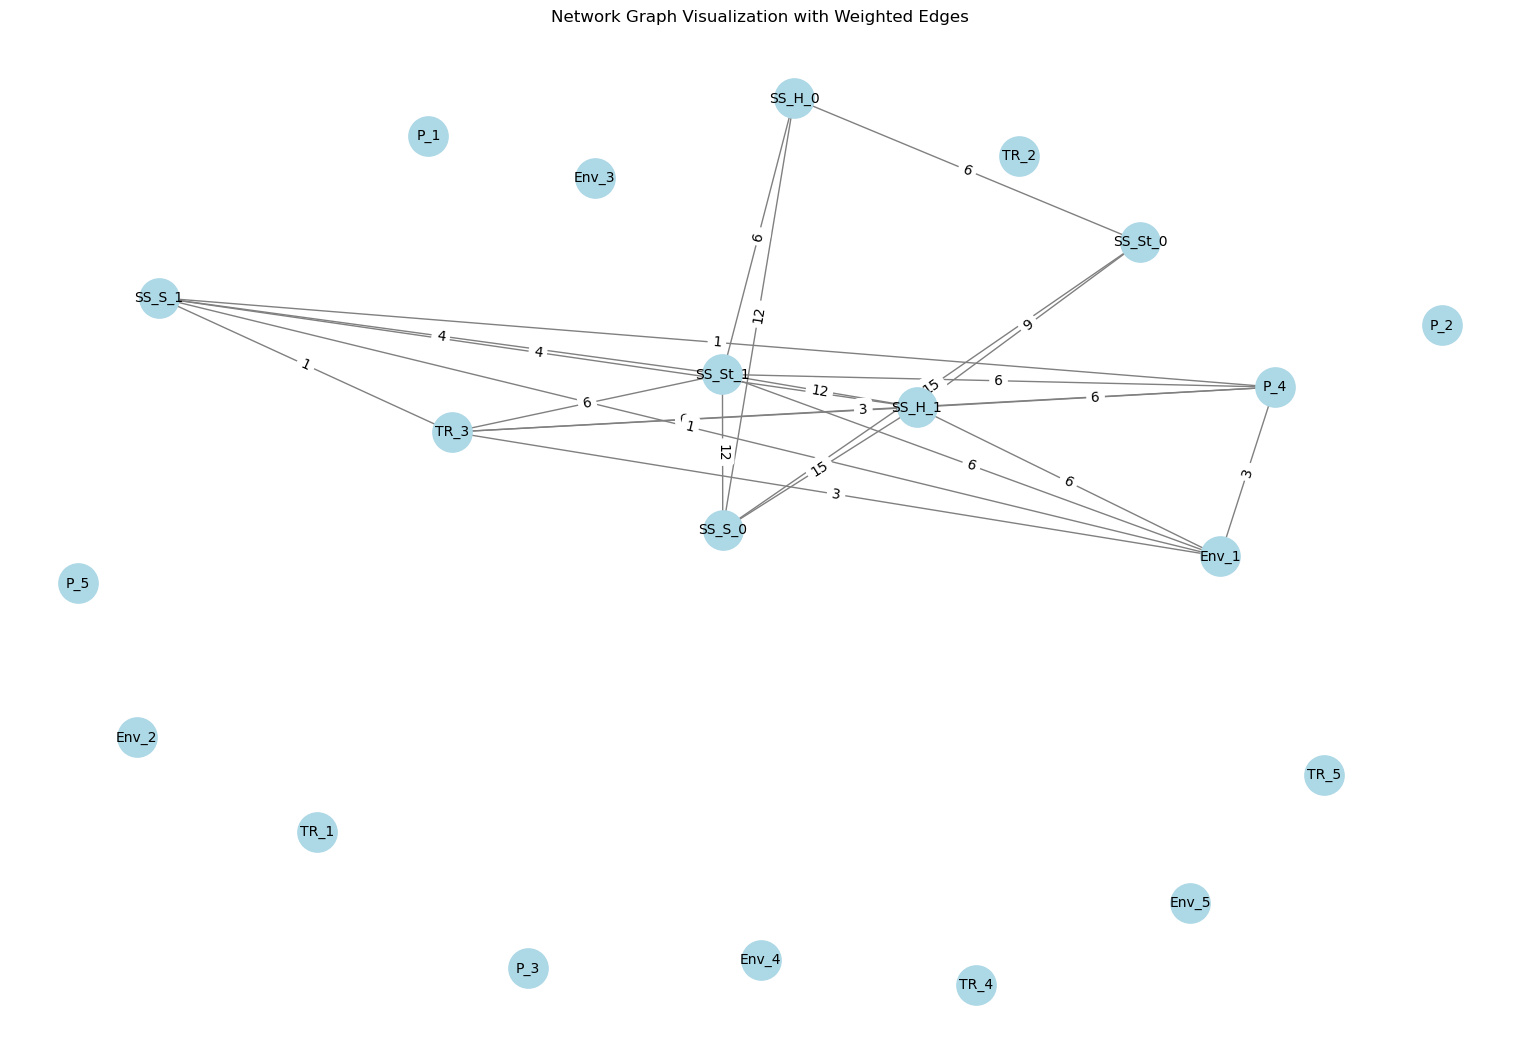

In [199]:
# Visualize the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42, k=3)  # Increase the k value to spread nodes out

nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10, edge_color='gray')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Network Graph Visualization with Weighted Edges")
plt.show()

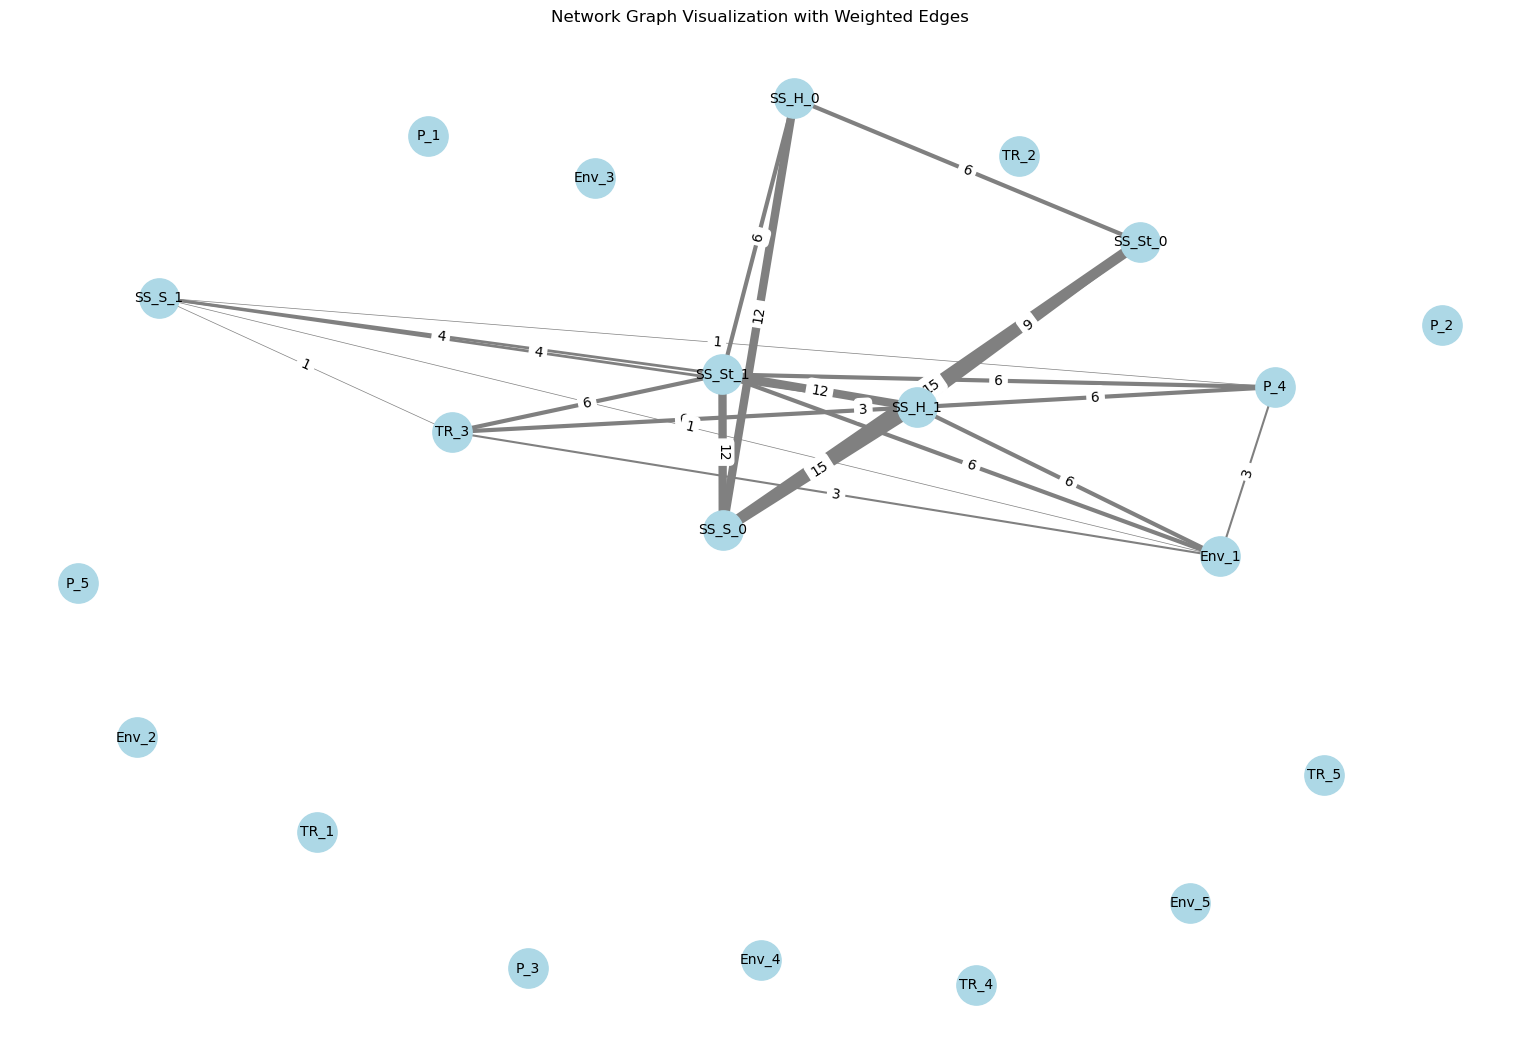

In [200]:
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42, k=3)  # Spread nodes out

# Get edge weights and use them for edge thickness
weights = nx.get_edge_attributes(G, 'weight').values()

nx.draw(
    G, pos, with_labels=True, node_size=800, node_color='lightblue', 
    font_size=10, edge_color='gray', 
    width=[w * 0.5 for w in weights]  # Scale the weights for thickness
)

# Add edge labels to show the weight
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Network Graph Visualization with Weighted Edges")
plt.show()
